In [3]:
!pip install healpy #biblioteca necesaria para poder trabajar con los datos del cmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 39.9 MB/s eta 0:00:00


In [4]:
from astropy.io import fits#importacion de librerias
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [5]:
dbz = [

    {
        "category": "Polarización",
        "description": "Mapas de polarización Q y U",
        "products": [
            {
                "name": "wmap_band_qumap_r4_9yr_K_v5.fits",
                "format": "FITS",
                "size": "0.03 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/9yr/raw/wmap_band_qumap_r4_9yr_K_v5.fits"
            },
            {
                "name": "wmap_band_qumap_r4_9yr_Ka_v5.fits",
                "format": "FITS",
                "size": "0.03 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/9yr/raw/wmap_band_qumap_r4_9yr_Ka_v5.fits"
            },
            {
                "name": "	wmap_band_qumap_r4_9yr_Q_v5.fits",
                "format": "FITS",
                "size": "0.03 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/9yr/raw/wmap_band_qumap_r4_9yr_Q_v5.fits"
            }
        ]
    },
    {
        "category": "Temperatura",
        "description": "Mapas de temperatura del CMB",
        "products": [
            {
                "name": "wmap_imap_r9_yr9_K1_v5.fits",
                "format": "FITS",
                "size": "24.01 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_K1_v5.fits"
            },
            {
                "name": "	wmap_imap_r9_yr9_Ka1_v5.fits",
                "format": "FITS",
                "size": "24.01 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_Ka1_v5.fits"
            },
            {
                "name": "	wmap_imap_r9_yr9_Q1_v5.fits",
                "format": "FITS",
                "size": "24.01 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_Q1_v5.fits"
            },
            {
                "name": "	wmap_imap_r9_yr9_Q2_v5.fits",
                "format": "FITS",
                "size": "24.01 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_Q2_v5.fits"
            },
            {
                "name": "wmap_imap_r9_yr9_V1_v5.fits",
                "format": "FITS",
                "size": "24.01 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_V1_v5.fits"
            },
            {
                "name": "wmap_imap_r9_yr9_V2_v5.fits",
                "format": "FITS",
                "size": "24.01 MB",
                "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_V2_v5.fits"
            }]}]

In [6]:
def categorias(db):#muestra las categorias y los archivos dentro de ellas
    for category in db:
        print(f"Categoría: {category['category']}")
        print(f"Descripción: {category['description']}")
        print("Productos:")
        for product in category['products']:
            print(f" - {product['name']} ({product['format']}, {product['size']})")
        print()

categorias(dbz)

Categoría: Polarización
Descripción: Mapas de polarización Q y U
Productos:
 - wmap_band_qumap_r4_9yr_K_v5.fits (FITS, 0.03 MB)
 - wmap_band_qumap_r4_9yr_Ka_v5.fits (FITS, 0.03 MB)
 - 	wmap_band_qumap_r4_9yr_Q_v5.fits (FITS, 0.03 MB)

Categoría: Temperatura
Descripción: Mapas de temperatura del CMB
Productos:
 - wmap_imap_r9_yr9_K1_v5.fits (FITS, 24.01 MB)
 - 	wmap_imap_r9_yr9_Ka1_v5.fits (FITS, 24.01 MB)
 - 	wmap_imap_r9_yr9_Q1_v5.fits (FITS, 24.01 MB)
 - 	wmap_imap_r9_yr9_Q2_v5.fits (FITS, 24.01 MB)
 - wmap_imap_r9_yr9_V1_v5.fits (FITS, 24.01 MB)
 - wmap_imap_r9_yr9_V2_v5.fits (FITS, 24.01 MB)



In [7]:
def busqueda(db, category_name):#busca una categoria en especifico y muestra lo que esta dentro de ella, en este caso buscamos temperatura
    for category in db:
        if category["category"] == category_name:
            return category
    return None

result = busqueda(dbz, "Temperatura")
if result:
    print(f"Productos en la categoría '{result['category']}':")
    for product in result["products"]:
        print(f" - {product['name']} ({product['format']}, {product['size']})")
else:
    print("Categoría no encontrada.")

Productos en la categoría 'Temperatura':
 - wmap_imap_r9_yr9_K1_v5.fits (FITS, 24.01 MB)
 - 	wmap_imap_r9_yr9_Ka1_v5.fits (FITS, 24.01 MB)
 - 	wmap_imap_r9_yr9_Q1_v5.fits (FITS, 24.01 MB)
 - 	wmap_imap_r9_yr9_Q2_v5.fits (FITS, 24.01 MB)
 - wmap_imap_r9_yr9_V1_v5.fits (FITS, 24.01 MB)
 - wmap_imap_r9_yr9_V2_v5.fits (FITS, 24.01 MB)


In [8]:
def nombre(db, product_name):#busca un producto por nombre y muestra lo que esta dentro de este
    for category in db:
        for product in category["products"]:
            if product["name"] == product_name:
                return product
    return None

product_name = "wmap_imap_r9_yr9_V2_v5.fits"
product = nombre(dbz, product_name)
if product:
    print(f"Producto encontrado: {product}")
else:
    print("Producto no encontrado.")

Producto encontrado: {'name': 'wmap_imap_r9_yr9_V2_v5.fits', 'format': 'FITS', 'size': '24.01 MB', 'url': 'https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_V2_v5.fits'}


In [9]:
def update(db, category_name, new_description):#actualiza la descripcion de una categoria
    for category in db:
        if category["category"] == category_name:
            category["description"] = new_description
            print(f"Descripción de '{category_name}' actualizada.")
            return
    print("Categoría no encontrada.")

update(dbz, "Temperatura", "Temperaturas del CMB")

Descripción de 'Temperatura' actualizada.


In [10]:
def añadir(db, category_name, new_product):#añade un producto a una categoria
    for category in db:
        if category["category"] == category_name:
            category["products"].append(new_product)
            print(f"Producto agregado a la categoría '{category_name}'.")
            return
    print("Categoría no encontrada.")

new_product = {
    "name": "wmap_imap_r9_yr9_W1_v5.fits",
    "format": "FITS",
    "size": "24.01 MB",
    "url": "https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_W1_v5.fits"
}
añadir(dbz, "Temperatura", new_product)

Producto agregado a la categoría 'Temperatura'.


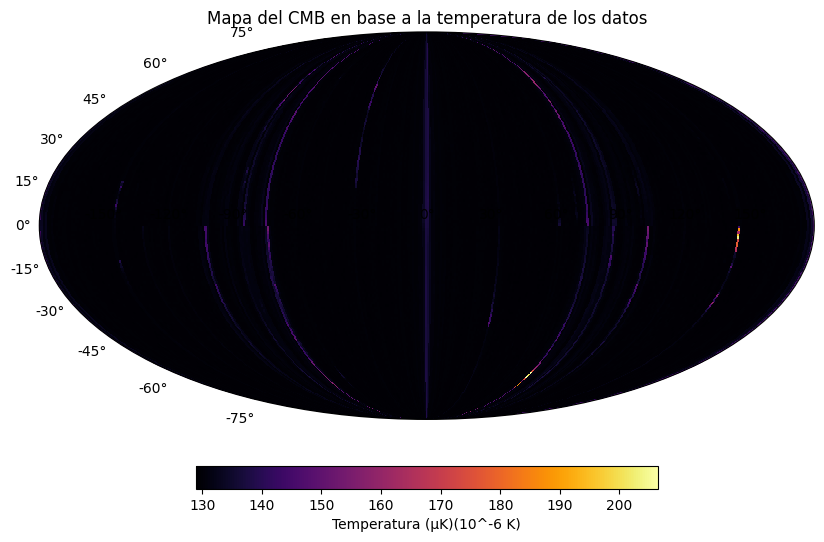

In [11]:
def cmbdat(db_products):

    for category in db_products:
        if category['category'] == 'Temperatura':
            url = category['products'][0]['url']

            try:
                with fits.open(url) as hdul:
                    data = hdul[1].data
                    simulated_data = data['TEMPERATURE']

                    nside = hp.get_nside(simulated_data)
                    npix = hp.nside2npix(nside)

                    simulated_data = simulated_data.reshape(npix)

                    lon = np.linspace(-180, 180, 360)
                    lat = np.linspace(-90, 90, 180)
                    lon_grid, lat_grid = np.meshgrid(lon, lat)

                    simulated_data_2d = hp.get_interp_val(
                        simulated_data, np.radians(lon_grid), np.radians(lat_grid)
                    )

                    return simulated_data_2d

            except Exception as e:
                return None


    return None



def pltmap(data):
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, projection="mollweide")


    n_lat, n_lon = data.shape
    lon = np.linspace(-np.pi, np.pi, n_lon)
    lat = np.linspace(-np.pi / 2, np.pi / 2, n_lat)
    lon_grid, lat_grid = np.meshgrid(lon, lat)


    im = ax.pcolormesh(lon_grid, lat_grid, data, cmap="inferno", shading="auto")
    cbar = plt.colorbar(im, ax=ax, orientation="horizontal", fraction=0.05, pad=0.1)
    cbar.set_label("Temperatura (μK)(10^-6 K)")
    plt.title("Mapa del CMB en base a la temperatura de los datos")
    plt.show()



dot = cmbdat(dbz)


if dot is not None:
    pltmap(dot)



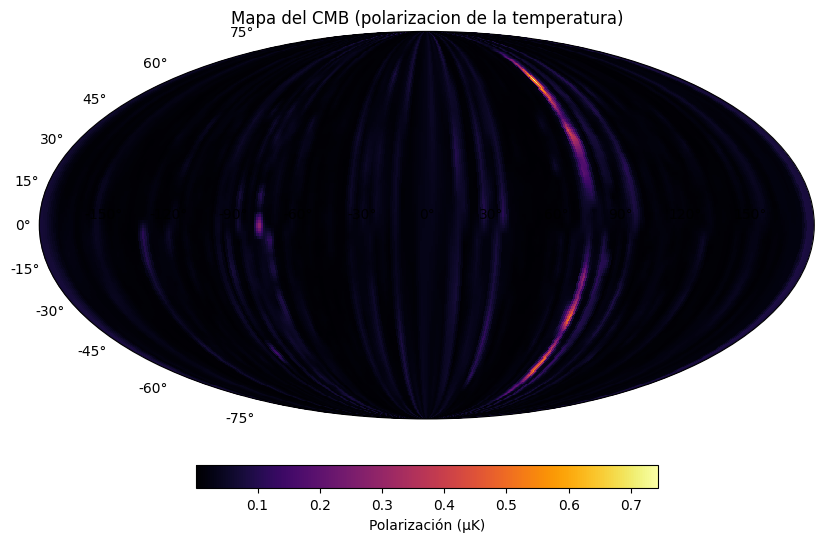

In [13]:
def datacmb(db_products):
    try:
        polarizacion_category = busqueda(db_products, "Polarización")
        if polarizacion_category is None:
            return None

        polarization_q_product = nombre(db_products, polarizacion_category['products'][0]['name'])
        polarization_u_product = nombre(db_products, polarizacion_category['products'][1]['name'])

        if polarization_q_product is None or polarization_u_product is None:
            return None

        polarization_q_url = polarization_q_product['url']
        polarization_u_url = polarization_u_product['url']

        with fits.open(polarization_q_url) as hdul_q:
            polarization_q_data = hdul_q[1].data['Q_POLARISATION']

        with fits.open(polarization_u_url) as hdul_u:
            polarization_u_data = hdul_u[1].data['U_POLARISATION']

        polarization = np.sqrt(polarization_q_data**2 + polarization_u_data**2)

        nside = hp.get_nside(polarization_q_data)

        polarization = polarization.flatten()

        lon = np.linspace(-180, 180, 360)
        lat = np.linspace(-90, 90, 180)
        lon_grid, lat_grid = np.meshgrid(lon, lat)

        simulated_data_2d = hp.get_interp_val(
            polarization, np.radians(lon_grid), np.radians(lat_grid)
        )

        return simulated_data_2d

    except Exception as e:
        return None


def plotmall(data):

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111, projection="mollweide")

    n_lat, n_lon = data.shape
    lon = np.linspace(-np.pi, np.pi, n_lon)
    lat = np.linspace(-np.pi / 2, np.pi / 2, n_lat)
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    im = ax.pcolormesh(lon_grid, lat_grid, data, cmap="inferno", shading="auto")
    cbar = plt.colorbar(im, ax=ax, orientation="horizontal", fraction=0.05, pad=0.1)
    cbar.set_label("Polarización (µK)")
    plt.title("Mapa del CMB (polarizacion de la temperatura)")
    plt.show()


simul = datacmb(dbz)

if simul is not None:
    plotmall(simul)

In [14]:
def calculaavgt(db_products):
    average_temperatures = []

    temperatura_category = busqueda(db_products, "Temperatura")
    if temperatura_category:
        for product in temperatura_category["products"]:
            url = product["url"]
            try:
                with fits.open(url) as hdul:
                    temperatura_data = hdul[1].data['TEMPERATURE']
                    avg_temperature = np.mean(temperatura_data)


                    if avg_temperature < 1:
                        avg_temperature = abs(avg_temperature)

                    average_temperatures.append({
                        "name": product["name"],
                        "avg_temperature": avg_temperature,
                        "url": product["url"]
                    })
            except Exception as e:
                print(f"Error al leer el archivo FITS {url}: {e}")

    return average_temperatures

In [15]:
avgt = calculaavgt(dbz)


print("Temperaturas promedio de los productos:")
for product in avgt:
    print(f"- {product['name']} (Temperatura promedio: {product['avg_temperature']:.2f} μK)")

Temperaturas promedio de los productos:
- wmap_imap_r9_yr9_K1_v5.fits (Temperatura promedio: 129.97 μK)
- 	wmap_imap_r9_yr9_Ka1_v5.fits (Temperatura promedio: 8.08 μK)
- 	wmap_imap_r9_yr9_Q1_v5.fits (Temperatura promedio: 156.76 μK)
- 	wmap_imap_r9_yr9_Q2_v5.fits (Temperatura promedio: 0.28 μK)
- wmap_imap_r9_yr9_V1_v5.fits (Temperatura promedio: 9.49 μK)
- wmap_imap_r9_yr9_V2_v5.fits (Temperatura promedio: 0.41 μK)
- wmap_imap_r9_yr9_W1_v5.fits (Temperatura promedio: 12.43 μK)


In [16]:
def contador(db_products):

    counts = {}
    for category in db_products:
        counts[category["category"]] = len(category["products"])
    return counts


cat = contador(dbz)

print("Cantidad de productos por categoría:")
for category, count in cat.items():
    print(f"- {category}: {count} productos")


Cantidad de productos por categoría:
- Polarización: 3 productos
- Temperatura: 7 productos


In [17]:
def grandote(db_products):

    largest_products = []
    max_size = 0.0

    for category in db_products:
        for product in category["products"]:
            size_mb = float(product["size"].replace(" MB", ""))
            if size_mb > max_size:
                largest_products = [{
                    "name": product["name"],
                    "size": product["size"],
                    "url": product["url"],
                    "category": category["category"]
                }]
                max_size = size_mb
            elif size_mb == max_size:
                largest_products.append({
                    "name": product["name"],
                    "size": product["size"],
                    "url": product["url"],
                    "category": category["category"]
                })
    return largest_products

largest_products = grandote(dbz)


if largest_products:
    print("El o los archivos mas grandes son:")
    for product in largest_products:
        print(f"- {product['name']} ({product['size']}) en la categoría '{product['category']}'")
        print(f"URL: {product['url']}")

El o los archivos mas grandes son:
- wmap_imap_r9_yr9_K1_v5.fits (24.01 MB) en la categoría 'Temperatura'
URL: https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_K1_v5.fits
- 	wmap_imap_r9_yr9_Ka1_v5.fits (24.01 MB) en la categoría 'Temperatura'
URL: https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_Ka1_v5.fits
- 	wmap_imap_r9_yr9_Q1_v5.fits (24.01 MB) en la categoría 'Temperatura'
URL: https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_Q1_v5.fits
- 	wmap_imap_r9_yr9_Q2_v5.fits (24.01 MB) en la categoría 'Temperatura'
URL: https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_Q2_v5.fits
- wmap_imap_r9_yr9_V1_v5.fits (24.01 MB) en la categoría 'Temperatura'
URL: https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9_V1_v5.fits
- wmap_imap_r9_yr9_V2_v5.fits (24.01 MB) en la categoría 'Temperatura'
URL: https://lambda.gsfc.nasa.gov/data/map/dr5/skymaps/1yr/raw/wmap_imap_r9_yr9